<a href="https://colab.research.google.com/github/saeed-alzhr/Task_5/blob/main/Task_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [212]:
# # Here is a helping code that will download and unzip the dataset for you.
# # Once you download the dataset you may comment the code!
# !kaggle datasets download -d khaledzsa/traffic-dataset
# !unzip traffic-dataset.zip

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
#read the dataset
df = pd.read_csv('Traffic Data.csv')


In [215]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [216]:
#look at the shape

df.shape

(20000, 8)

In [217]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [218]:
# first we should change the date_time type to datetime
df["date_time"] = pd.to_datetime(df["date_time"])

In [219]:
#let us sort the data basied on the time
df.sort_values(by="date_time", inplace=True)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

Text(0, 0.5, 'traffic_volume')

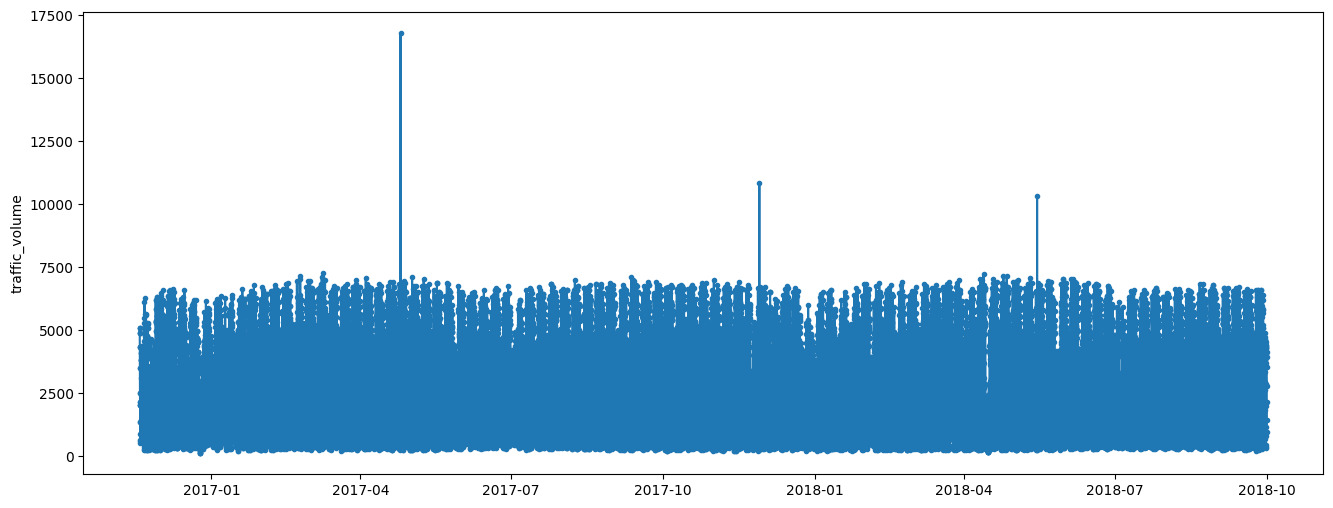

In [220]:
plt.figure(figsize=(16,6))
plt.plot(df["date_time"],df["traffic_volume"],marker=".",label="traffic_volume")
plt.ylabel("traffic_volume")

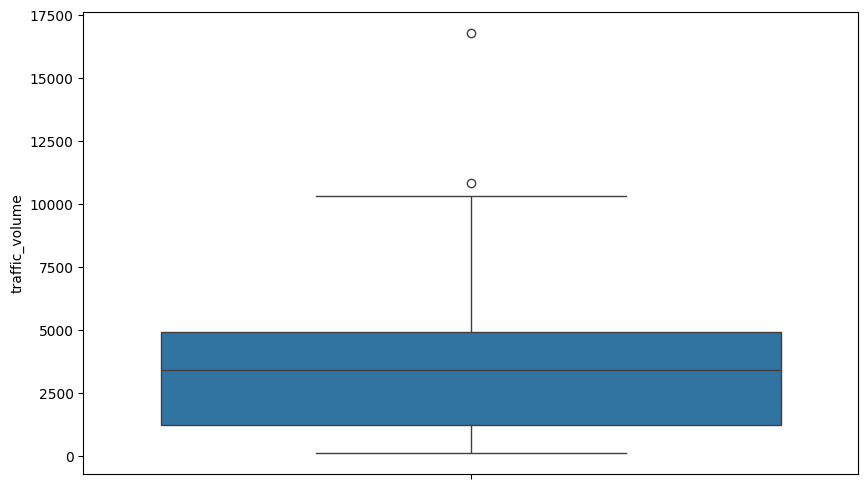

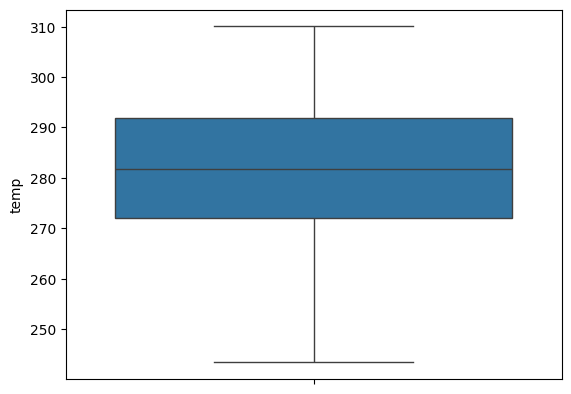

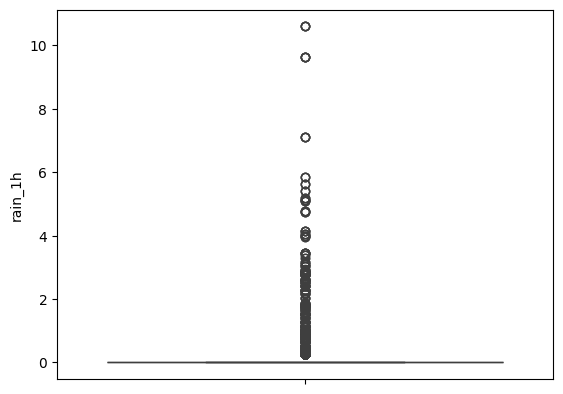

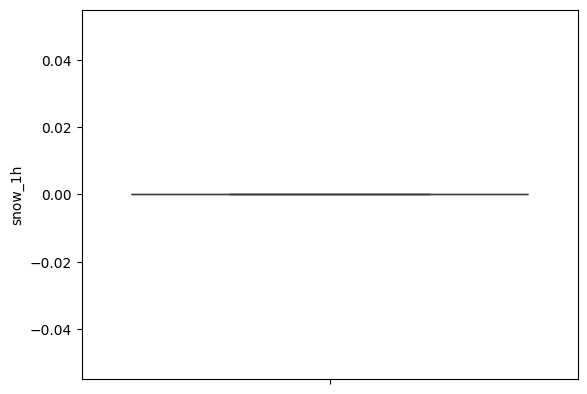

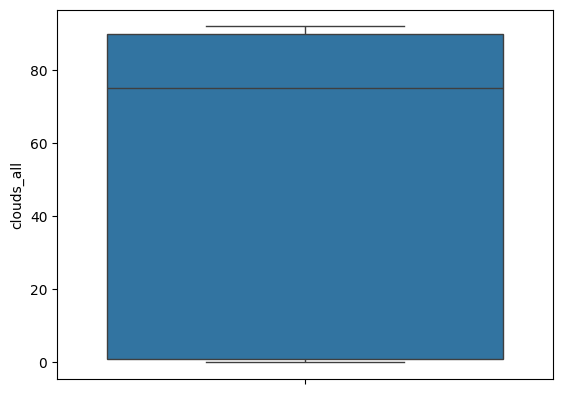

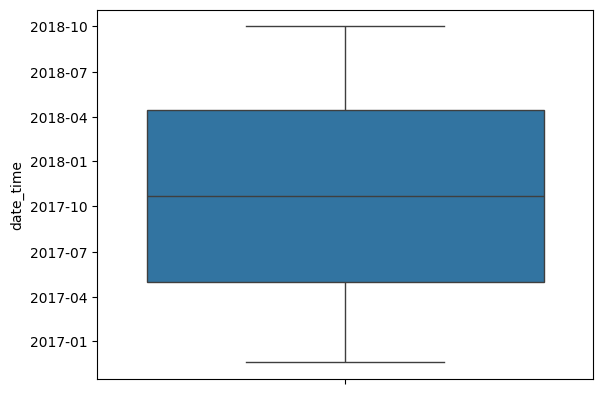

In [221]:
# plot the plot box to see the outliers
plt.figure(figsize=(10,6))
for col in df.select_dtypes(exclude="object").columns:
    sns.boxplot(df[col])
    plt.show()


##my comment

**from the boxplot we can see that the columns that has outliers are rain_h1 and traffic value but the traffic only has two outliers**


In [222]:
df.duplicated().sum()
# remove dupilcat
df.drop_duplicates(inplace=True)

In [223]:
df["date_time"].value_counts()
# there is date_time point that are repeted

,count
date_time,
2018-03-20 14:00:00,5
2018-08-24 07:00:00,5
2016-12-25 21:00:00,5
2016-12-25 02:00:00,5
2018-04-14 09:00:00,5
...,...
2017-07-28 21:00:00,1
2017-07-28 22:00:00,1
2017-07-28 23:00:00,1


In [224]:
df["date_time"].unique()

<DatetimeArray>
['2016-11-18 15:00:00', '2016-11-18 16:00:00', '2016-11-18 17:00:00',
 '2016-11-18 18:00:00', '2016-11-18 19:00:00', '2016-11-18 20:00:00',
 '2016-11-18 21:00:00', '2016-11-18 22:00:00', '2016-11-18 23:00:00',
 '2016-11-19 00:00:00',
 ...
 '2018-09-30 14:00:00', '2018-09-30 15:00:00', '2018-09-30 16:00:00',
 '2018-09-30 17:00:00', '2018-09-30 18:00:00', '2018-09-30 19:00:00',
 '2018-09-30 20:00:00', '2018-09-30 21:00:00', '2018-09-30 22:00:00',
 '2018-09-30 23:00:00']
Length: 16269, dtype: datetime64[ns]

In [225]:
df["date_time"].duplicated().sum()

3719

In [226]:
# we can see from the first rows that date_time is repeted 3 times and from the value counts of the date_time we know that should be handled each date_time should apper only on time
#the value of the duplicated is vary high beacause the weather_description beacause there is many date_time with different weather description people describe the weather differntly || so i will drop it
# the same with th

df.drop_duplicates(subset="date_time",inplace=True)

<Figure size 1600x600 with 0 Axes>

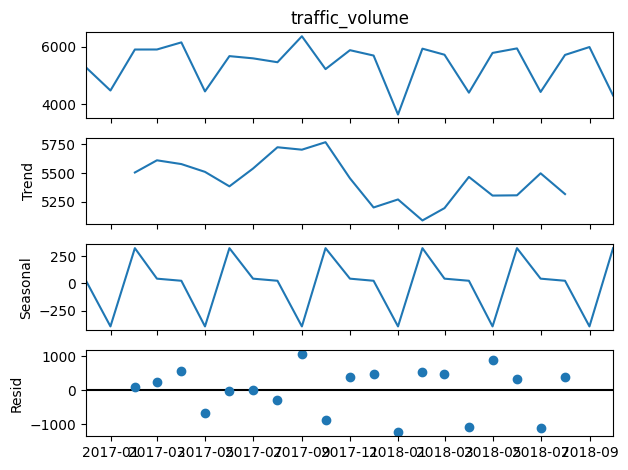

In [228]:
import statsmodels.api as sm
# here we are looking for the seasonalty
# Make a copy of df to not miss the real one
df_copy = df.copy()

# Set the index to "Date_index"
df_copy.set_index("date_time", inplace=True)

df_seasonal = df_copy.asfreq('M')  # set frequency as Mounth
plt.figure(figsize=(16,6))
# Perform seasonal decomposition with a period of 4
res = sm.tsa.seasonal_decompose(df_seasonal["traffic_volume"], model="additive", period=4)#the peroid is evrey Number of year or mounth so here we looking for ever 4 mounths what is the seasonlaty

# Plot the decomposition
res.plot()

plt.show()

**we can see that there is season ever 4 mounths**

<Figure size 1600x1000 with 0 Axes>

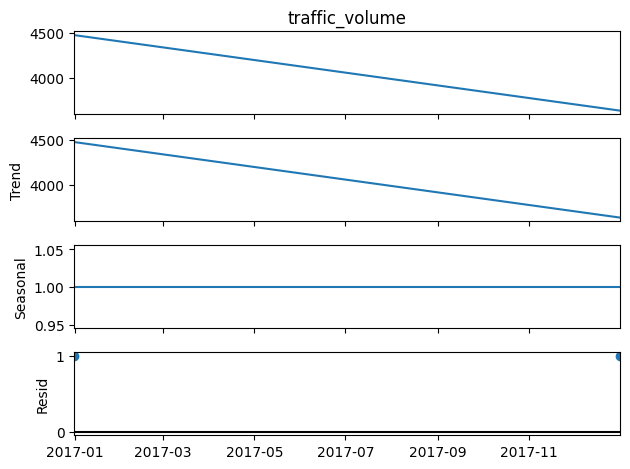

In [229]:
df_copy = df.copy()

# Set the index to "Date_index"
df_copy.set_index("date_time", inplace=True)

df_seasonal = df_copy.asfreq('A')  # set frequency as anunal year
plt.figure(figsize=(16,10))# Perform seasonal decomposition with a period of 4
res = sm.tsa.seasonal_decompose(df_seasonal["traffic_volume"], model="multiplicative", period=1)#the peroid is evrey Number of year or mounth so here we looking for ever 1 year what is the seasonlaty

# Plot the decomposition
res.plot()
plt.show()

**the trend is going down**

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [230]:
df.isna().sum()
#the trffic is the only one that has missing values

,0
traffic_volume,16
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [231]:
#let us check the values of traffic_volume
df["traffic_volume"].value_counts()

#here we know that the data dose not need to resample beacuse the data points hvae more then one and there is no dominants from singl one

,count
traffic_volume,
353.0,20
358.0,19
373.0,19
340.0,19
344.0,17
...,...
6036.0,1
226.0,1
6879.0,1


In [232]:
# let us fill the the traffic with the mean or the mode
# df["traffic_volume"].mode()
# df["traffic_volume"].mean()

# aftter seeing the mode and the mean i will go with the mean beacause the values are  far from each other it will not be fair to fill with the mode

df["traffic_volume"].fillna(df["traffic_volume"].mean(),inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [233]:
# here we looking for the trend using the rolling
moving_average = df["traffic_volume"].rolling(
    window=365,       # 365 window size
    center=True,      #center the data around the average
    min_periods=183,
).mean()
moving_average.head()
df["moving_average"] = moving_average# add the moving average to th df

In [234]:
# create the lag column
df['Lag_1'] = df['traffic_volume'].shift(1)
df_lag = df[['traffic_volume', 'Lag_1']]
df_lag.head()

,traffic_volume,Lag_1
7745,4872.0,NaN
8867,5074.0,4872.0
14066,4328.0,5074.0
2646,3486.0,4328.0
3684,2524.0,3486.0


In [235]:
# Calculate the difference between consecutive values in Depth_to_Groundwater_P24
df['traffic_volume_Diff'] = df['traffic_volume'].diff()

In [236]:
# make day of the Week
df['Day_of_Week'] = df['date_time'].dt.dayofweek
# make the mounth
df['Month'] = df['date_time'].dt.month
# make the day of the yaer
df['Day_of_Year'] = df['date_time'].dt.dayofyear
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,moving_average,Lag_1,traffic_volume_Diff,Day_of_Week,Month,Day_of_Year
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,2613.437158,NaN,NaN,4,11,323
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,2609.467391,4872.0,202.0,4,11,323
14066,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,2016-11-18 17:00:00,2608.394595,5074.0,-746.0,4,11,323
2646,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,2016-11-18 18:00:00,2610.634409,4328.0,-842.0,4,11,323
3684,2524.0,273.58,0.0,0.0,90,Snow,light snow,2016-11-18 19:00:00,2615.598930,3486.0,-962.0,4,11,323


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16269 entries, 7745 to 3795
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       16269 non-null  float64       
 1   temp                 16269 non-null  float64       
 2   rain_1h              16269 non-null  float64       
 3   snow_1h              16269 non-null  float64       
 4   clouds_all           16269 non-null  int64         
 5   weather_main         16269 non-null  object        
 6   weather_description  16269 non-null  object        
 7   date_time            16269 non-null  datetime64[ns]
 8   moving_average       16269 non-null  float64       
 9   Lag_1                16268 non-null  float64       
 10  traffic_volume_Diff  16268 non-null  float64       
 11  Day_of_Week          16269 non-null  int32         
 12  Month                16269 non-null  int32         
 13  Day_of_Year          16269 non-nul

In [238]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,moving_average,Lag_1,traffic_volume_Diff,Day_of_Week,Month,Day_of_Year
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,2613.437158,NaN,NaN,4,11,323
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,2609.467391,4872.0,202.0,4,11,323
14066,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,2016-11-18 17:00:00,2608.394595,5074.0,-746.0,4,11,323
2646,3486.0,273.59,0.0,0.0,90,Snow,heavy snow,2016-11-18 18:00:00,2610.634409,4328.0,-842.0,4,11,323
3684,2524.0,273.58,0.0,0.0,90,Snow,light snow,2016-11-18 19:00:00,2615.598930,3486.0,-962.0,4,11,323


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [239]:
# before we split we need to deal with catogrical columns
# i decieded to drop them beacuse what i want to predact is traffic_volume
df.drop(columns=["weather_main","weather_description"],inplace=True)

# and then i need to deal with the date time beacause you can not fit it to the model
df['Date_index'] = np.arange(len(df.index))# this will be the replacement of the date beacause the date are sorted we can reprsent them with index
df.drop(columns=["date_time"],inplace=True)

In [240]:
df.set_index("Date_index",inplace=True)

In [241]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,moving_average,Lag_1,traffic_volume_Diff,Day_of_Week,Month,Day_of_Year
Date_index,,,,,,,,,,,
0,4872.0,274.08,0.0,0.0,90,2613.437158,NaN,NaN,4,11,323
1,5074.0,273.84,0.0,0.0,90,2609.467391,4872.0,202.0,4,11,323
2,4328.0,273.62,0.0,0.0,90,2608.394595,5074.0,-746.0,4,11,323
3,3486.0,273.59,0.0,0.0,90,2610.634409,4328.0,-842.0,4,11,323
4,2524.0,273.58,0.0,0.0,90,2615.598930,3486.0,-962.0,4,11,323


In [253]:
train_size = int(0.8 * len(df))  # take 80% of the data for training and 20% for testing
train_data, test_data = df[:train_size], df[train_size:]

In [254]:
train_data.shape

(13014, 11)

In [255]:
test_data.shape

(3254, 11)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [256]:
#here we scale the data before fiting it to the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [257]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers import Dropout

In [264]:
# we need to change the data shape so we will reshape it so it can fit the models
X_train = train_scaled[:-1].reshape((train_scaled[:-1].shape[0], 1, train_scaled[:-1].shape[1]))
y_train = train_scaled[1:, 0]
X_test = test_scaled[:-1].reshape((test_scaled[:-1].shape[0], 1, test_scaled[:-1].shape[1]))
y_test = test_scaled[1:, 0]

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [282]:
# building the LSTM model
model = Sequential()
#first layer
model.add(LSTM(units=120, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
#seconde
model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.2))
#thired
model.add(LSTM(units=30))
model.add(Dropout(0.2))
#output layer with one units
model.add(Dense(units=1))
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                       │ (None, 1, 120)              │          63,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 1, 120)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 1, 60)               │          43,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 1, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 30)                  │          10,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,751 (459.96 KB)

 Trainable params: 117,751 (459.96 KB)

 Non-trainable params: 0 (0.00 B)

In [283]:
model.compile(loss='mae',optimizer='adam')
history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=36, validation_data=(X_test, y_test), verbose=2, shuffle=False)


Epoch 1/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 2/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 3/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 4/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 5/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 6/20
362/362 - 2s - 4ms/step - loss: nan - val_loss: nan
Epoch 7/20
362/362 - 2s - 5ms/step - loss: nan - val_loss: nan
Epoch 8/20
362/362 - 2s - 5ms/step - loss: nan - val_loss: nan
Epoch 9/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 10/20
362/362 - 1s - 4ms/step - loss: nan - val_loss: nan
Epoch 11/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 12/20
362/362 - 1s - 4ms/step - loss: nan - val_loss: nan
Epoch 13/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 14/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 15/20
362/362 - 1s - 3ms/step - loss: nan - val_loss: nan
Epoch 16/20
362/362 - 2s - 4ms/step - loss: nan -

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [265]:
#predict with the X_test
predaction = lstm_model.predict(X_test)


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [284]:
rmse = np.sqrt(mean_squared_error(y_test, predaction))
mae = mean_absolute_error(y_test, predaction)
# printi the result of it
print('Test RMSE: ' ,rmse)
print('Test MAE:  ' ,mae)

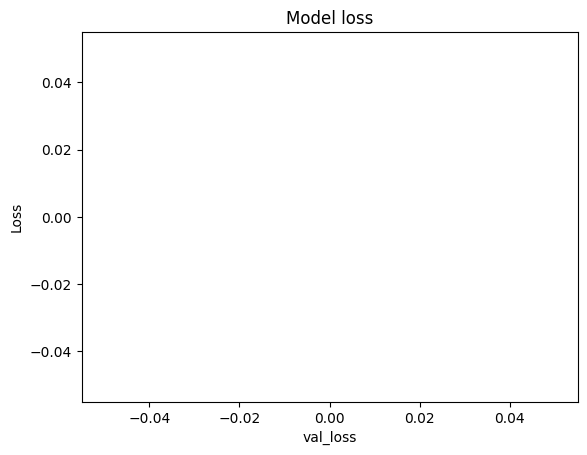

In [285]:
# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [280]:
from tensorflow.keras.layers import GRU

GRU_model = Sequential()
# first layer
GRU_model.add(GRU(120, input_shape=(X_train.shape[1], X_train.shape[2])))
GRU_model.add(Dropout(0.2))

#out putlyaer
GRU_model.add(Dense(1))

#summer and compile
GRU_model.summary()
GRU_model.compile(loss='mae', optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                         │ (None, 120)                 │          47,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,001 (187.50 KB)

 Trainable params: 48,001 (187.50 KB)

 Non-trainable params: 0 (0.00 B)

In [281]:
history_GRU = gru_model.fit(X_train, y_train, epochs=20, batch_size=36, validation_data=(X_test, y_test), verbose=2, shuffle=False)


Epoch 1/20
362/362 - 1s - 3ms/step - loss: 0.0293 - val_loss: 0.0361
Epoch 2/20
362/362 - 1s - 3ms/step - loss: 0.0292 - val_loss: 0.0355
Epoch 3/20
362/362 - 1s - 3ms/step - loss: 0.0289 - val_loss: 0.0350
Epoch 4/20
362/362 - 1s - 3ms/step - loss: 0.0290 - val_loss: 0.0345
Epoch 5/20
362/362 - 1s - 4ms/step - loss: 0.0288 - val_loss: 0.0349
Epoch 6/20
362/362 - 2s - 7ms/step - loss: 0.0285 - val_loss: 0.0341
Epoch 7/20
362/362 - 1s - 3ms/step - loss: 0.0283 - val_loss: 0.0333
Epoch 8/20
362/362 - 1s - 4ms/step - loss: 0.0283 - val_loss: 0.0333
Epoch 9/20
362/362 - 1s - 3ms/step - loss: 0.0280 - val_loss: 0.0330
Epoch 10/20
362/362 - 1s - 3ms/step - loss: 0.0280 - val_loss: 0.0333
Epoch 11/20
362/362 - 1s - 3ms/step - loss: 0.0279 - val_loss: 0.0330
Epoch 12/20
362/362 - 1s - 3ms/step - loss: 0.0277 - val_loss: 0.0331
Epoch 13/20
362/362 - 1s - 4ms/step - loss: 0.0276 - val_loss: 0.0328
Epoch 14/20
362/362 - 1s - 4ms/step - loss: 0.0277 - val_loss: 0.0337
Epoch 15/20
362/362 - 2s - 6m

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [270]:
predaction_1 = GRU_model.predict(X_test)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [271]:
rmse = np.sqrt(mean_squared_error(y_test, predaction_1))
mae = mean_absolute_error(y_test, predaction_1)
# printi the result of it
print('Test RMSE: ' ,rmse)
print('Test MAE:  ' ,mae)

Test RMSE:  0.11840573470816253
Test MAE:   0.10467101252747006


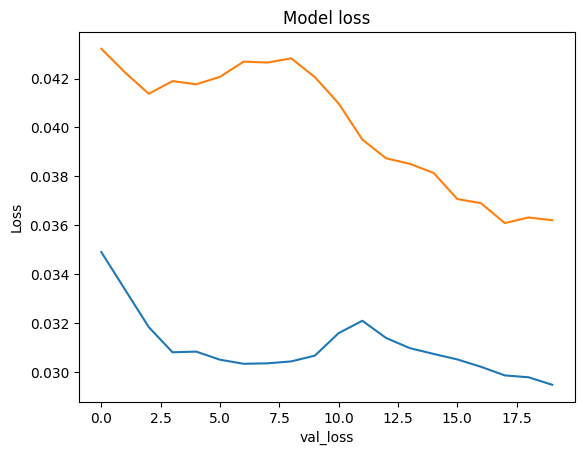

In [272]:
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

- i did remove the mising value form the traffic column and fill them with the mean beacause the are distrputed , the model will not except nan values

- i created two featuers that i thik it helped the model the moving average and the lag so the model can see what next from what happed before

- i tride to build the model with 3 layers just by trying with the first layer with 120 uints and then i did half 60 and then 30 the loss funcation i went with mean abslut error (mae)

- i split the data into 80 trian  to 20 test  so the model

-  i toke the MAE RMSE for the model we try to reduce them as much as possibl

- in the future it will be better if we take the data in short peroids and then train the model for each peroid